---
title: PA 8.2
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true        
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import palmerpenguins as p
import numpy as np
import pandas as pd

In [3]:
penguins = p.load_penguins()
penguins = penguins.dropna().reset_index(drop=True) # must reset index to match dummy variables
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [5]:
X = penguins.drop(columns='species')
y = penguins['species']

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### Model 1

In [31]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

model_1 = Pipeline(
  [("preprocessing", ct),
  ('classifier', KNeighborsClassifier(n_neighbors=1))]
)

In [32]:
y_pred1 = cross_val_predict(model_1, X, y, cv=5)

In [33]:
conf_matrix1 = confusion_matrix(y, y_pred1, labels=y.unique())
conf_matrix_df1 = pd.DataFrame(conf_matrix1, index=y.unique(), columns=y.unique())
conf_matrix_df1.index.name = "Actual"
conf_matrix_df1.columns.name = "Predicted"
conf_matrix_df1

Predicted,Adelie,Gentoo,Chinstrap
Actual,,,
Adelie,131,0,15
Gentoo,0,119,0
Chinstrap,5,0,63


In [34]:
report1 = classification_report(y, y_pred1, target_names=y.unique())
print(report1)

              precision    recall  f1-score   support

      Adelie       0.96      0.90      0.93       146
      Gentoo       0.81      0.93      0.86        68
   Chinstrap       1.00      1.00      1.00       119

    accuracy                           0.94       333
   macro avg       0.92      0.94      0.93       333
weighted avg       0.94      0.94      0.94       333



### Model 2

In [35]:
model_2 = Pipeline(
  [("preprocessing", ct),
  ('classifier', KNeighborsClassifier(n_neighbors=100))]
)

In [36]:
y_pred2 = cross_val_predict(model_2, X, y, cv=5)

In [38]:
conf_matrix2 = confusion_matrix(y, y_pred2, labels=y.unique())
conf_matrix_df2 = pd.DataFrame(conf_matrix2, index=y.unique(), columns=y.unique())
conf_matrix_df2.index.name = "Actual"
conf_matrix_df2.columns.name = "Predicted"
conf_matrix_df2

Predicted,Adelie,Gentoo,Chinstrap
Actual,,,
Adelie,146,0,0
Gentoo,0,119,0
Chinstrap,39,0,29


In [39]:
report2 = classification_report(y, y_pred2, target_names=y.unique())
print(report2)

              precision    recall  f1-score   support

      Adelie       0.79      1.00      0.88       146
      Gentoo       1.00      0.43      0.60        68
   Chinstrap       1.00      1.00      1.00       119

    accuracy                           0.88       333
   macro avg       0.93      0.81      0.83       333
weighted avg       0.91      0.88      0.87       333



### Model 3

In [40]:
model_3 = Pipeline(
  [("preprocessing", ct),
  ('classifier', DecisionTreeClassifier(random_state=42, max_depth=2, criterion='gini'))]
)

In [41]:
model_3.fit(X, y)
y_pred3 = cross_val_predict(model_3, X, y, cv=5)

In [42]:
conf_matrix3 = confusion_matrix(y, y_pred3, labels=y.unique())
conf_matrix_df3 = pd.DataFrame(conf_matrix3, index=y.unique(), columns=y.unique())
conf_matrix_df3.index.name = "Actual"
conf_matrix_df3.columns.name = "Predicted"
conf_matrix_df3

Predicted,Adelie,Gentoo,Chinstrap
Actual,,,
Adelie,138,0,8
Gentoo,0,117,2
Chinstrap,6,0,62


In [18]:
report3 = classification_report(y, y_pred3, target_names=y.unique())
print(report3)

              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       146
      Gentoo       0.87      0.91      0.89        68
   Chinstrap       0.99      0.98      0.99       119

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.95      0.95      0.95       333



### Model 4

In [19]:
model_4 = Pipeline(
  [("preprocessing", ct),
  ('classifier', DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.000000001, criterion='entropy'))]
)

In [20]:
model_4.fit(X, y)
y_pred4 = cross_val_predict(model_4, X, y, cv=5)

In [21]:
conf_matrix4 = confusion_matrix(y, y_pred4, labels=y.unique())
conf_matrix_df4 = pd.DataFrame(conf_matrix4, index=y.unique(), columns=y.unique())
conf_matrix_df4.index.name = "Actual"
conf_matrix_df4.columns.name = "Predicted"
conf_matrix_df4

Predicted,Adelie,Gentoo,Chinstrap
Actual,,,
Adelie,143,1,2
Gentoo,1,118,0
Chinstrap,2,0,66


In [22]:
report4 = classification_report(y, y_pred4, target_names=y.unique())
print(report4)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98       146
      Gentoo       0.97      0.97      0.97        68
   Chinstrap       0.99      0.99      0.99       119

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



In [23]:
adelie = (y == 'Adelie')

In [24]:
adelie

0       True
1       True
2       True
3       True
4       True
       ...  
328    False
329    False
330    False
331    False
332    False
Name: species, Length: 333, dtype: bool

In [25]:
y_probs_1 = cross_val_predict(model_1, X, adelie, cv=5, method='predict_proba')[:, 1]  # probability for positive class
y_probs_2 = cross_val_predict(model_2, X, adelie, cv=5, method='predict_proba')[:, 1]
y_probs_3 = cross_val_predict(model_3, X, adelie, cv=5, method='predict_proba')[:, 1]
y_probs_4 = cross_val_predict(model_4, X, adelie, cv=5, method='predict_proba')[:, 1]

In [26]:
fpr_1, tpr_1, _ = roc_curve(adelie, y_probs_1)
fpr_2, tpr_2, _ = roc_curve(adelie, y_probs_2)
fpr_3, tpr_3, _ = roc_curve(adelie, y_probs_3)
fpr_4, tpr_4, _ = roc_curve(adelie, y_probs_4)

In [30]:
auc_1 = roc_auc_score(adelie, y_probs_1)
auc_2 = roc_auc_score(adelie, y_probs_2)
auc_3 = roc_auc_score(adelie, y_probs_3)
auc_4 = roc_auc_score(adelie, y_probs_4)
print([auc_1, auc_2, auc_3, auc_4])

[0.9435206211999121, 0.9441066588528313, 0.9583180719361218, 0.9775291187458794]


In [28]:
import plotnine as p9

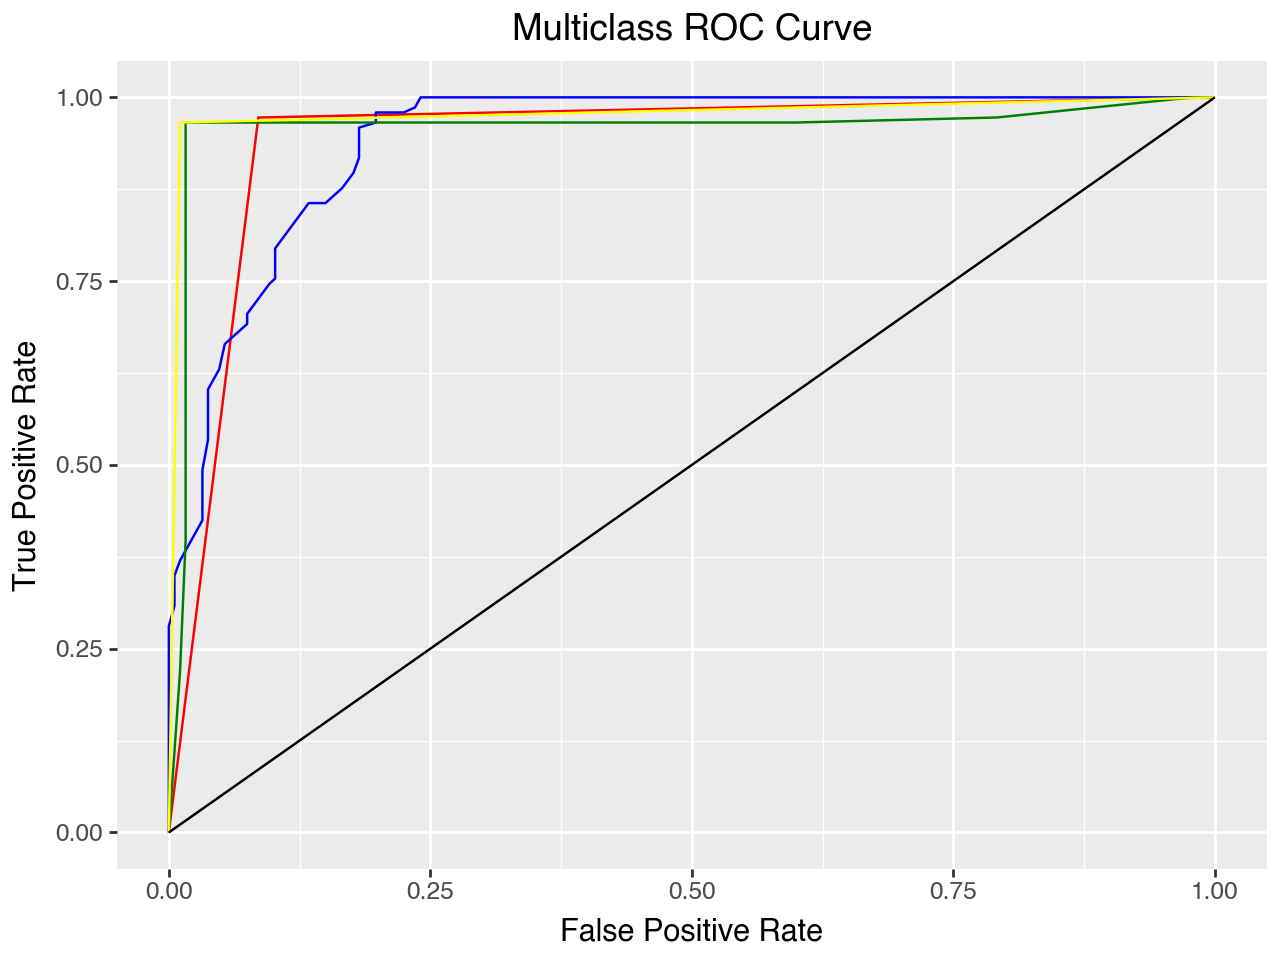

In [29]:
linex = np.linspace(0, 1, 100)
liney = np.linspace(0, 1, 100)
(p9.ggplot(p9.aes(x=1, y=1)) +
p9.geom_line(p9.aes(x=fpr_1, y = tpr_1), color = 'red') +
p9.geom_line(p9.aes(x=fpr_2, y = tpr_2), color = 'blue') +
p9.geom_line(p9.aes(x=fpr_3, y = tpr_3), color = 'green') +
p9.geom_line(p9.aes(x=fpr_4, y = tpr_4), color = 'yellow') +
p9.geom_line(p9.aes(x=linex, y = liney), color = 'black') +
p9.labs(title='Multiclass ROC Curve', x='False Positive Rate', y='True Positive Rate')
)